# House Price Prediction with Catboost

- CatBoost is a powerful approach to predict the house price for stakeholders in real estate industry that includes buying home, sellers and investors. 
- This Project aims to explore the application of CatBoost for predicting house prices using the California housing dataset.

# Why to use Catboost for House Price Prediction?
- There are many machine learning algorithms like XGBoost, Random Forest for predictive analysis but, for this project we are going to use CatBoost because:

1. CatBoost is capable to handle categorical feature without manual encoding hence, it is suitable for the dataset diverse categorical variables such as location, neighborhood, and property type.
2. CatBoost typically delivers strong performance without extensive hyperparameter tuning. This saves time and resources for practitioners, allowing them to focus on model interpretation and application rather than fine-tuning parameters.
3. CatBoost can handle missing data effectively without requiring imputation or preprocessing, simplifying the data preparation process and allowing for more straightforward modeling pipelines.

# Predicting House Price with CatBoost
- In this section, we begin the steps to predict the house price. Before beginning with the implementation, we make sure that we have installed Catboost module.
- You can install the Catboost module using the following command: pip install catboost 

# Step 1: Importing Necessary Libraries
- We will be importing necessary libraries including Pandas, NumPy, Matplotlib, Seaborn, CatBoostRegressor, and scikit-learn utilities for fetching California housing dataset, splitting data, and evaluating regression model performance.

In [4]:
%pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [7]:
print(np.__version__) # just checking the verstion of numpy because catboos won't work with vesrions 2 and above


1.26.4


# Step 2: Loading California Housing Dataset
- 
Once, we have imported the libraries, we will load the California housing dataset, create a DataFrame that contains the data and target variables, and print the first few rows of the DataFrame to inspect the dataset structure. The California housing dataset comprises various features, including median income, house age, room and bedroom averages, population, and geographical coordinates, aimed at predicting house prices in California.

In [8]:
# Load the California housing dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['Price'] = california_housing.target
print(data.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


# Step 3: Exploratory Data Analysis (EDA) on California Housing Dataset
- 
This section conducts Exploratory Data Analysis (EDA) on the California Housing Dataset to gain insights into its features, distributions, and relationships before modeling
- 

Checking For Missing Values in the Data. et
We will prepare a chon eck the data types and missing values in the California housing dataset and print a summary of the information, including data types and counts of non-null values for each column.

In [9]:
# Check the data types and missing values
print("\nData types and missing values:")
print(data.info())



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


# Summary Statistics
- Here we will get the summary statistics of our data.

In [10]:
# Summary statistics
print("\nSummary statistics:")
print(data.describe())



Summary statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        

# Correlation Matrix
- Below we shall find a correlation matrix for the California housing dataset and visualize it using a heatmap, providing insights into the relationships between different features in the dataset.

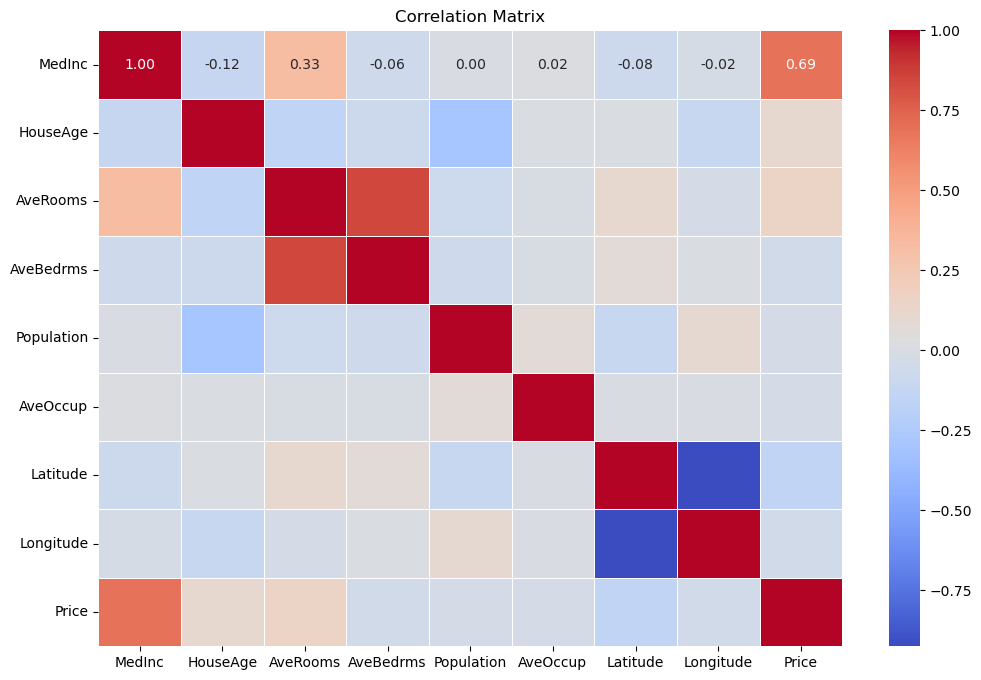

In [11]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


# Visualizing the Distribution of the House Prices
- Below we shall create a histogram to visualize the distribution of the target variable (house prices) in the California housing dataset, providing an overview of its frequency distribution.

E:\Anaconda_Python3_Codes\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


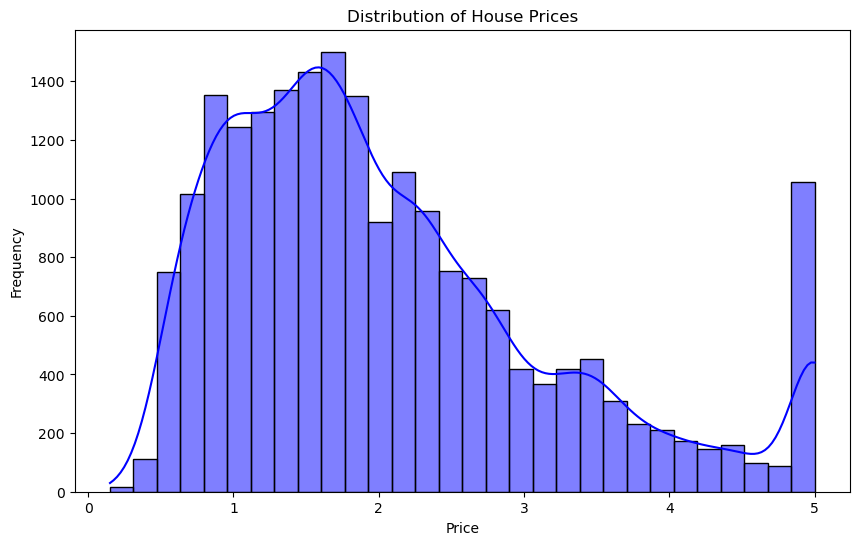

In [12]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True, color='blue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


# Step 4: Data Preprocessing
- After EDA, we will be splitting the dataset into Features(X) and Target (Y) variables and split the X and Y variables into test and train sets.

In [13]:
# Split the data into features and target variable
X = data.drop(columns=['Price'])  # Features
y = data['Price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 5: Training CatBoost Model
- Using the following code, we will train a CatBoost regression model with specified hyperparameters, including the number of iterations, tree depth, learning rate, and loss function, on the training data (X_train and y_train).

In [14]:
# Train the CatBoost model
model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train, y_train, verbose=100)


0:	learn: 1.0916893	total: 169ms	remaining: 2m 48s
100:	learn: 0.4856977	total: 890ms	remaining: 7.92s
200:	learn: 0.4317457	total: 1.56s	remaining: 6.19s
300:	learn: 0.4010594	total: 2.23s	remaining: 5.19s
400:	learn: 0.3779586	total: 2.91s	remaining: 4.35s
500:	learn: 0.3608106	total: 3.57s	remaining: 3.56s
600:	learn: 0.3459401	total: 4.24s	remaining: 2.81s
700:	learn: 0.3332879	total: 5.03s	remaining: 2.15s
800:	learn: 0.3220272	total: 5.78s	remaining: 1.44s
900:	learn: 0.3119731	total: 6.8s	remaining: 747ms
999:	learn: 0.3024983	total: 7.69s	remaining: 0us


# Step 6: Make Prediction
- Here, we will makespredictions on the test set using the trained CatBoost regression model and calculate the Mean Squared Error (MSE) between the actual and predicted house prices.
- It then visualizes the relationship between actual and predicted prices through a scatter plot, providing insights into the model’s performance.


Mean Squared Error: 0.1913493487945774

Mean Absolute Error: 0.28688667445548305

R-squared: 0.8539773826554166


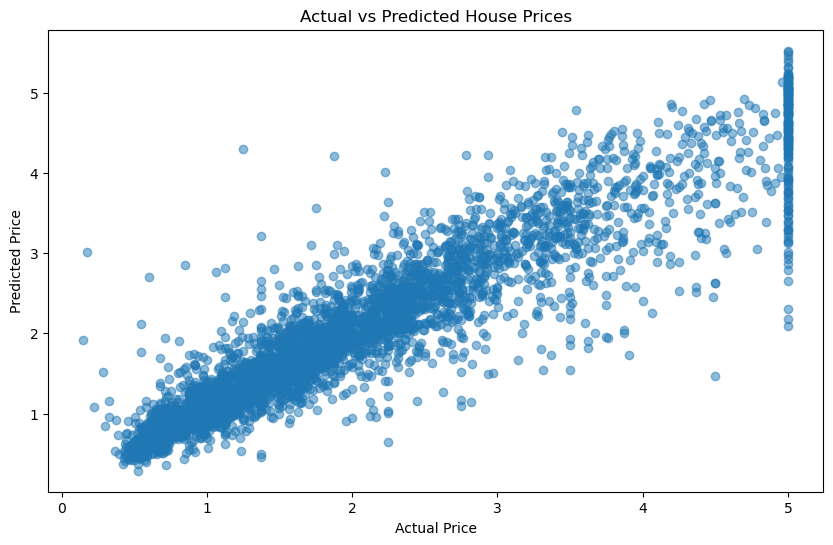

In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("\nMean Absolute Error:", mae)

# Calculate R-squared
rsquared = r2_score(y_test, y_pred)
print("\nR-squared:", rsquared)

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


- The Mean Squared Error (MSE) indicates the average squared difference between the actual and predicted house prices, with a value of approximately 0.1913. The Mean Absolute Error (MAE) represents the average absolute difference between actual and predicted prices, yielding a value of approximately 0.2869. The R-squared (R²) value of around 0.854 signifies that the model explains approximately 85.4% of the variance in the target variable, suggesting a good fit of the model to the data. Overall, these metrics indicate that the CatBoost regression model performs well in predicting house prices on the test set.

# Step 7: Defining a Function to Estimate House Prices
- We define a function estimate_house_price that utilizes a trained regression model to predict the price of a house based on input features. The example usage demonstrates estimating the price of a house using a dictionary of input features and printing the estimated price.

In [19]:
def estimate_house_price(model, input_data):
    input_df = pd.DataFrame(input_data, index=[0])
    estimated_price = model.predict(input_df)
    return estimated_price[0]

# Example usage of the estimation function
input_data = {
    'MedInc': 5.0,
    'HouseAge': 20.0,
    'AveRooms': 6.0,
    'AveBedrms': 1.5,
    'Population': 2000,
    'AveOccup': 3.0,
    'Latitude': 34.05,
    'Longitude': -118.25
}

estimated_price = estimate_house_price(model, input_data)
print("Estimated Price of the House:", estimated_price)


Estimated Price of the House: 2.6512059143024156


# Getting Results
- The output “Estimated Price of the House: 2.6512059143024156” indicates that the predicted price of the house, based on the provided input features, is approximately $2.65 million.